In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
rel=pd.read_csv("Data.csv")
print(rel.shape)
rel.head()

(496, 14)


,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,06-Nov-2020,EQ,"1,990.00","2,040.00","1,978.15","1,955.00","2,025.00","2,029.15","2,015.72","2,369.35",875.65,30770080,"62,023,880,104.20",649196
1,05-Nov-2020,EQ,"1,954.95","1,960.95","1,932.00","1,913.20","1,956.80","1,955.00","1,949.03","2,369.35",875.65,17170274,"33,465,297,065.50",448665
2,04-Nov-2020,EQ,"1,837.00","1,929.00","1,837.00","1,850.40","1,910.50","1,913.20","1,893.24","2,369.35",875.65,37003111,"70,055,655,614.20",888904
3,03-Nov-2020,EQ,"1,890.00","1,909.00","1,835.10","1,877.45","1,854.50","1,850.40","1,873.92","2,369.35",875.65,40931170,"76,701,761,539.15",990935
4,02-Nov-2020,EQ,"2,027.00","2,027.00","1,859.15","2,054.50","1,876.00","1,877.45","1,927.55","2,369.35",875.65,45857806,"88,393,320,147.20",1428490


In [4]:
rel.iloc[:,2]

0      1,990.00
1      1,954.95
2      1,837.00
3      1,890.00
4      2,027.00
         ...   
491    1,105.05
492    1,074.00
493    1,097.70
494    1,106.25
495    1,115.00
Name: OPEN , Length: 496, dtype: object

In [5]:
rel.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [6]:
rel_update=rel[["Date ","close "]]

In [7]:
rel_update.head()

,Date,close
0,06-Nov-2020,"2,029.15"
1,05-Nov-2020,"1,955.00"
2,04-Nov-2020,"1,913.20"
3,03-Nov-2020,"1,850.40"
4,02-Nov-2020,"1,877.45"


In [8]:
rel_update.rename(columns={"Date ":"Date", "close ":"Close"},inplace=True)

/Users/kartikeygarg/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
rel_ind=rel_update.set_index("Date",drop=True)

In [10]:
rel_update=rel_update.sort_values(by="Date").reset_index().drop("index", axis=1)

In [11]:
rel_update.head()

,Date,Close
0,01-Apr-2019,"1,391.85"
1,01-Apr-2020,"1,080.45"
2,01-Aug-2019,"1,180.25"
3,01-Feb-2019,"1,249.95"
4,01-Feb-2020,"1,383.35"


In [12]:
rel_update['Date']=pd.to_datetime(rel_update['Date'])

In [13]:
rel_update.head()

,Date,Close
0,2019-04-01,"1,391.85"
1,2020-04-01,"1,080.45"
2,2019-08-01,"1,180.25"
3,2019-02-01,"1,249.95"
4,2020-02-01,"1,383.35"


In [14]:
rel_update["Close"]=rel_update.iloc[:,1].str.replace(",","").astype(float)

In [15]:
rel_update.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

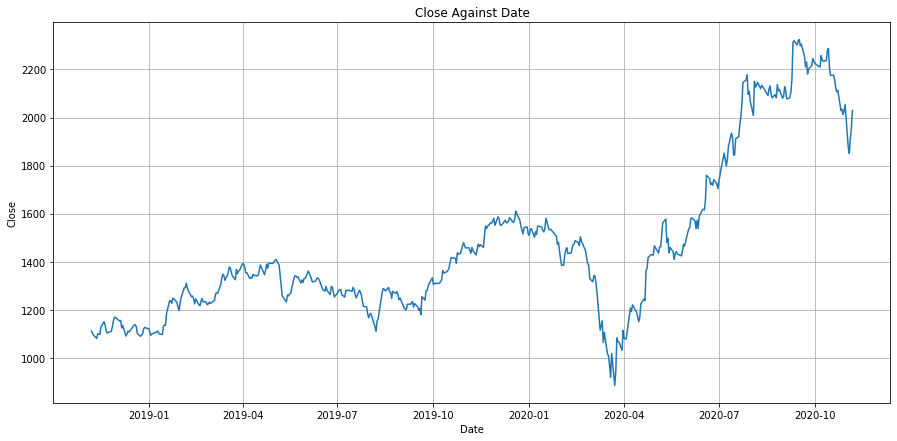

In [16]:
fig,ax= plt.subplots(figsize=(15,7))
sns.lineplot(data=rel_update, x="Date",y="Close",markers=True)
plt.title("Close Against Date")
plt.grid(True)
plt.show()

In [17]:
rel_ind.index=rel_update["Date"]

In [18]:
rel_ind.head()

,Close
Date,
2019-04-01,"2,029.15"
2020-04-01,"1,955.00"
2019-08-01,"1,913.20"
2019-02-01,"1,850.40"
2020-02-01,"1,877.45"


In [26]:
rel_ind=rel_update

In [40]:
rel_ind.set_index("Date",drop=True,inplace=True)

In [48]:
rel_ind.sort_index(inplace=True)

In [58]:
def stationary_test(data, Window):
    from statsmodels.tsa.stattools import adfuller
    data.dropna(inplace=True)
    data_mean=data["Close"].rolling(Window).mean()
    data_deviation=data["Close"].rolling(Window).std()
    fig, ax=plt.subplots(figsize=(15,7))
    ax.plot(data["Close"],color="blue",alpha=0.5)
    ax.plot(data_deviation,color="red")
    ax.plot(data_mean, color="green")
    plt.legend(["Original","Deviation","Mean"])
    plt.show()
    print("___________________________ADFULLER TEST_____________________________")
    dftest=adfuller(data,autolag='AIC')
    dfoutput=pd.Series(dftest[0:2],index=["Test Statistic","p-value"])
    print(dfoutput)

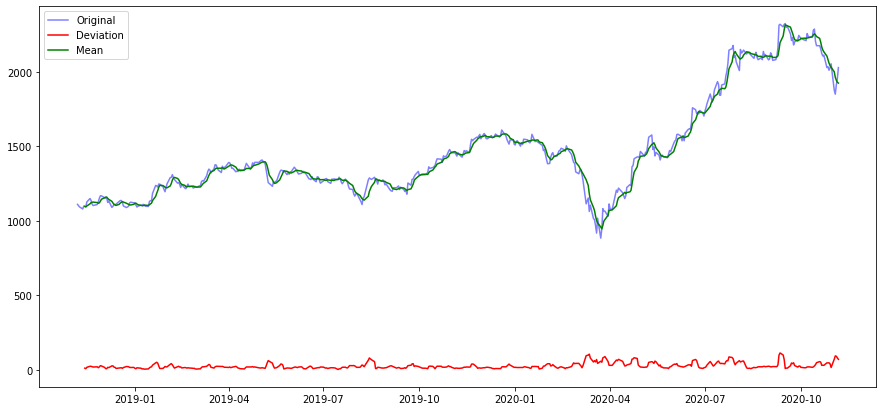

___________________________ADFULLER TEST_____________________________
Test Statistic   -0.943477
p-value           0.773318
dtype: float64


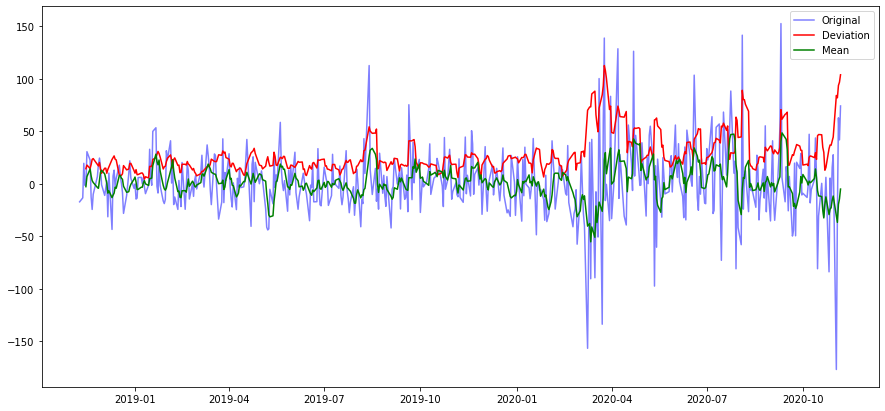

___________________________ADFULLER TEST_____________________________
Test Statistic   -8.699531e+00
p-value           3.842735e-14
dtype: float64


In [59]:
stationary_test(rel_ind,5)
stationary_test(rel_ind.diff(),5)

In [60]:
rel_ind.head()

,Close
Date,
2018-11-07,1110.70
2018-11-09,1093.45
2018-11-12,1080.00
2018-11-13,1099.45
2018-11-14,1097.95


## Let's look at the trend, seasonality and random component of the time series

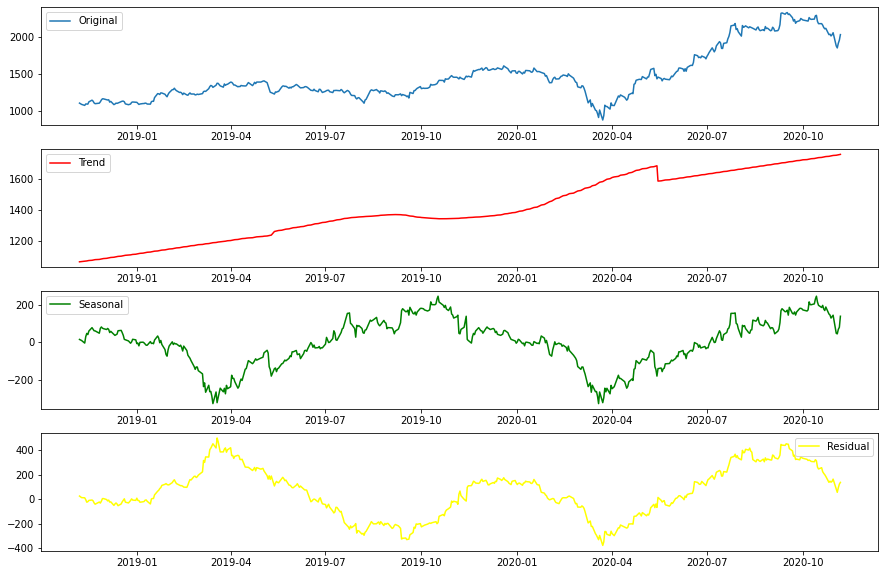

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(rel_ind, extrapolate_trend='freq', period=248, model="additive")
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
fig, ax= plt.subplots(figsize=(15,10))
plt.subplot(411)
plt.plot(rel_ind,label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label="Trend",color="red")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal,label="Seasonal",color="green")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual,label="Residual",color="yellow")
plt.legend(loc="best")

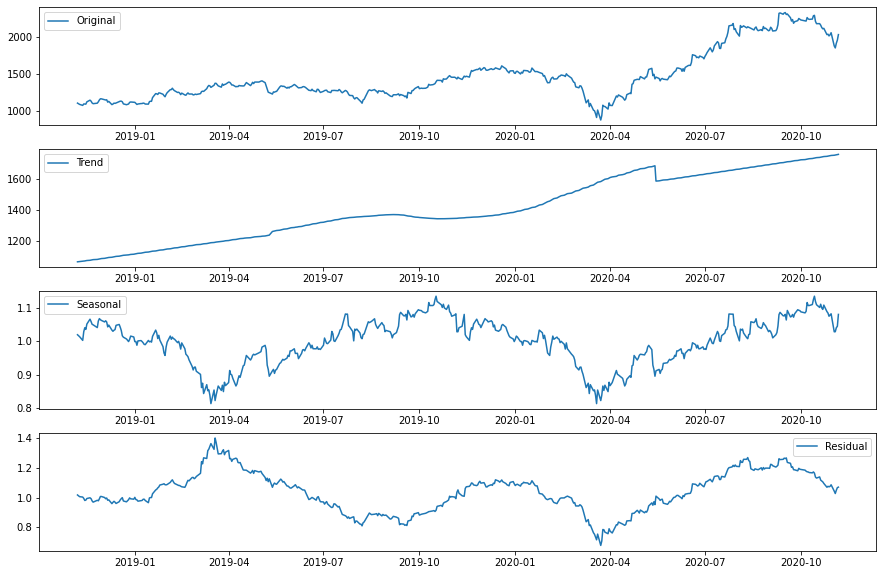

In [88]:
decomposition=seasonal_decompose(rel_ind, extrapolate_trend='freq', period=248, model="multiplicative")
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
fig, ax= plt.subplots(figsize=(15,10))
plt.subplot(411)
plt.plot(rel_ind,label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal,label="Seasonal")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual,label="Residual")
plt.legend(loc="best")

In [85]:
rel_plot=rel_ind.iloc[:,0].sub(residual).sub(seasonal)

In [86]:
rel_plot.head()

Date
2018-11-07    1069.746574
2018-11-09    1071.129008
2018-11-12    1072.511441
2018-11-13    1073.893875
2018-11-14    1075.276308
dtype: float64

rel_plot should be equivalent to trend chart. If it is not then model is probably multiplicative.

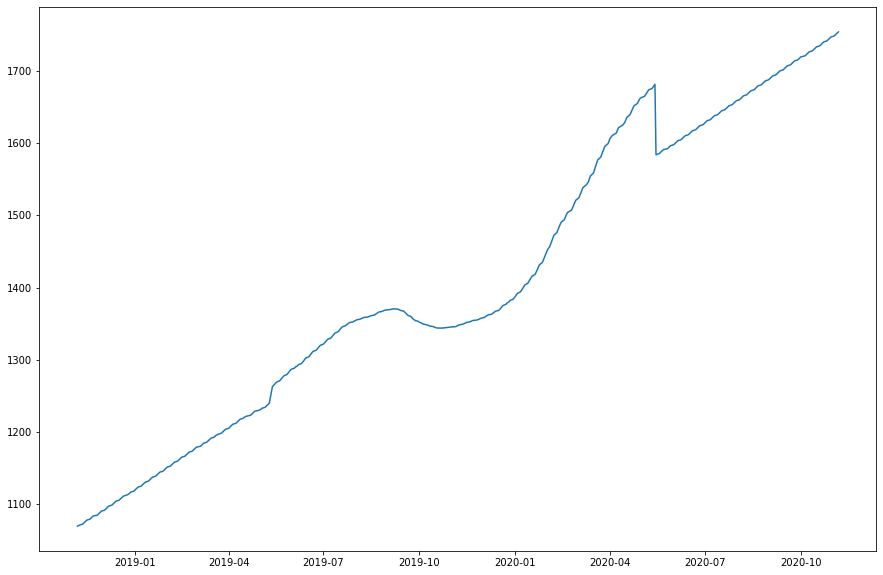

In [87]:
fig, ax=plt.subplots(figsize=(15,10))
plt.plot(rel_plot)
plt.show()

By observing the above code we can deduce that the time series is actually additive.

# Forecasting Using Traditional Time Series Models

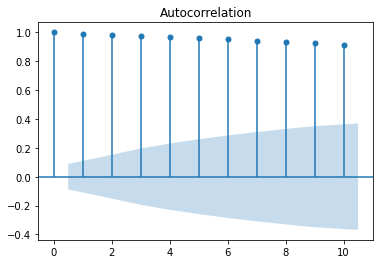

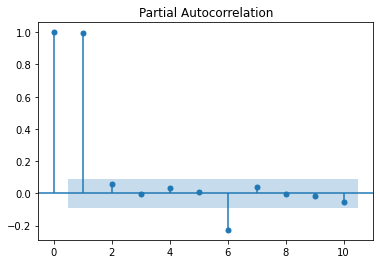

In [89]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(rel_ind, lags=10)
plot_pacf(rel_ind, lags=10)
plt.show()